<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/Lecture08_solving_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Notes**❕
This content forms a part of the instructional presentations for the **`numerical methods in chemical engineering`** course designed for undergraduate chemical engineering students at Amirkabir University of Technology.

Feel free to utilize the information and source codes provided in this material, ensuring appropriate acknowledgment of the original document.

The visual elements featured in this document have been sourced from the following sources, unless specified otherwise:

* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).


<div align="center">
🟪 🟪 🟪
</dive>

---

# 🔴 1) Where do we face with solving ODEs?

## 1-1) Chemical Reactor Modeling (from a few to tens of equations)
* ODEs are used to model and simulate chemical reactions in reactors.

<table width="100%">
<tr>
<td width = "65%">

* For example, the kinetics of a chemical reaction in a batch reactor can be described using ODEs to predict how concentrations of reactants and products change over time within the reactor.
Certainly! Let's consider a chemical reactor with two competing reactions:

1. **Reaction 1:** A + B → C
2. **Reaction 2:** C → D


* We can describe the concentrations of the species A, B, C, and D over time using a system of ODEs:

\begin{aligned}
\frac{d[A]}{dt} &= -k_1[A][B] \\
\frac{d[B]}{dt} &= -k_1[A][B] \\
\frac{d[C]}{dt} &= k_1[A][B] - k_2[C] \\
\frac{d[D]}{dt} &= k_2[C] \\
\end{aligned}


</td>
<td>
<div align = "center">
<img src = "https://drive.google.com/uc?id=1KZBPBqW-yKlTQnqDhtMVmEYByhVMiK5Q" width ="200">
</div>
</td>
</tr>
</table>


* These equations describe how the concentrations of A, B, C, and D change over time due to the competing reactions.

* This system of ODEs can be solved numerically to predict how the concentrations of A, B, C, and D evolve over time in the chemical reactor as the reactions occur.



## 1-2) Heat transfer in a sphere (one equation)

<table width="100%">
<tr>
<td width = "65%">

* The ODE for lumped heat transfer in a solid sphere can be written as follows:

 $$\rho V C_p \frac{dT}{dt} = h A_s (T_{∞} - T)$$

 Here:
 - $T$ is the temperature of the solid sphere as a function of time $t$ (the dependent variable).
 - $\rho$ is the density of the material.
 - $V$ is the volume of the sphere.
 - $C_p$ is the specific heat capacity of the material.

 - $h$ is the convective heat transfer coefficient between the sphere's surface and the surrounding fluid.
 - $A_s$ is the surface area of the sphere.
 - $T_{∞}$ is the temperature of the surrounding fluid (often assumed to be constant).

* Solving this ODE allows you to predict how the temperature of the solid sphere evolves over time when subjected to convective heat transfer.

</td>
<td>
<div align = "center">
<img src = "https://drive.google.com/uc?id=1pe2gJX5_w3H8x69ydZPyojlX3rYHCMvL" width ="300">
</div>
</td>
</tr>
</table>







## 1-3) Heat Transfer (tens to thousands equations)
* You have a one-dimensional solid rod of length $L$, and you want to model the temperature distribution along the rod as heat is conducted through it, $T(x, t)$:

 $$\rho c \frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\left(k \frac{\partial T}{\partial x}\right)$$

 Here:
 - $T(x, t)$ is the temperature as a function of position $x$ along the rod and time $t$.
 - $\rho$ is the density of the material.
 - $c$ is the specific heat capacity of the material.
 - $k$ is the thermal conductivity of the material.



<div align="center">
<img src="https://drive.google.com/uc?id=1fSBtHdpahzyAET2SDMlGMc_wD4wT-k8P" width ="500">
</div>


* **Solution (method of lines):** You can discretize the rod into small segments and approximate the derivatives with finite differences. This will convert the PDE into a system of ODEs. For example, using the finite-difference method, you can write an ODE for each segment of the rod:

$$\frac{dT_i}{dt} = \frac{k}{\rho c}\left(\frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2}\right)$$

Here:
- $T_i$ is the temperature at the $i$-th segment.
- $\Delta x$ is the length of each segment.


# 🟡 2) Overview of one-step integration of ODEs


* An ODE can be expressed as:
 $$
\begin{aligned}
y^{'} &= \frac{dy}{dt} = f(t,y)  \ \ \ \text{or} \\  y^{'} &= \frac{dy}{dx} = f(x,y)
\end{aligned}
\tag{2-1}
 $$
 Here,
 * $y$ is dependent vairable, and
 * $x$ and $t$ are dependent variables.

* In general, **one-step integration** methods can be formulated as:
$$
new \ value = old \ value + step \ size × slope
\tag{2-2}
$$
* and in mathematical terms:
$$
y_{i+1} = y_i + h ϕ
\tag{2-3}
$$
 Here:
 * $y_i$ is the value dependent variable at $x_i$
 * $y_{i+1}$ is the new value of dependent variable at $x_{i+1} = x_i + h$.
 * $\phi$ is the increament function.
 * $h$ is step size for integration.

<div align="center">
🟨 🟨 🟨
</div>


---



# 🟢 3) Euler's mehtod

<table width="100%">
<tr>
<td width = "60%">

* The first derivative provides a direct estimate of the slope at $t_i$:

$$
\begin{aligned}
\phi &= f(t_i,y_i)  \\
y_{i+1} &= y_i + f(t_i,y_i) h
\end{aligned}
\tag{3-1}
$$

</td>
<td>
<div align = "center">
<img src = "https://drive.google.com/uc?id=1ab4HRwjkkTpOPfOveD-1rzDlgeY_Wsb4" width ="500">
</div>
</td>
</tr>
</table>



### ❓ **Example 1:**
Integrate the following equation using Euler’s method in the range [0,4] with $h = 1$ and $y(0) = 2$. Compare your results with the exact solution, $y=e^{-0.5 t} (-1.07692 + 3.07692 e^{1.3 t})$.
$$
y^{'}=4e^{0.8t}-0.5y
$$



💡 *Solution*



## 2-1) Code for Euler's method

In [3]:
import numpy as np

def EulerMethod(dfx, y0, a, b , n):

  h = (b-a)/n

  y = np.zeros((n+1,))
  x = np.zeros((n+1,))

  y[0] = y0;
  x[0] = a;

  for i in range(n):
    y[i+1] = y[i] + h * dfx(x[i],y[i])
    x[i+1] = a + (i+1)*h;

  return y, x

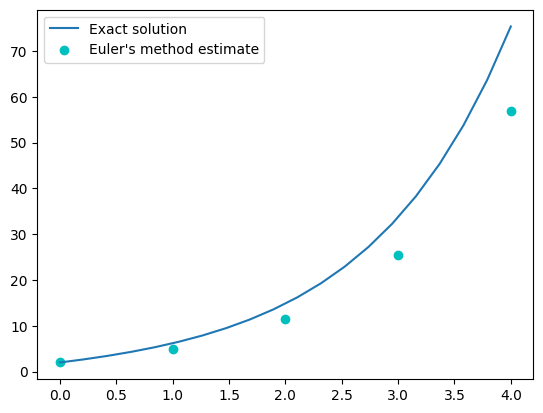

In [4]:
import matplotlib.pyplot as plt

# ode
example1Dfx = lambda t,y: 4*np.exp(0.8*t) - 0.5*y
# solution of ode
y , t = EulerMethod(example1Dfx, 2.0, 0.0, 4.0, 4)

# exact solution
fx_exact = lambda t : np.exp(-0.5*t) * (-1.07692 + 3.07692 * np.exp(1.3*t))
tt = np.linspace(0,4,20)
y_exact = [fx_exact(ti) for ti in tt]

# plot
plt.plot(tt,y_exact)
plt.scatter(t,y,c='c')
plt.legend(["Exact solution", "Euler's method estimate"])
plt.show()

## 3-2) Error analysis of Euler method
* The truncation error in the solution of IVPs composed of two parts:
 * **Local truncation error**: results from the application of integration formula over a single step.
 * **Propagated truncation error**: results from the approximates produced in the previous steps

* The sum of the two (local and propagated) is the **global truncation error**.

* Using Taylor series expansion we have:
$$
\begin{aligned}
y_{i+1} &= y_i + y^{'}_ih + \frac{y^"_i}{2!}h^2 + ...+\frac{y^{(n)}_i}{n!}h^n+R_n  \\
R_n &= \frac{y^{(n+1)}_i(ξ)}{(n+1)!}h^{n+1}
\end{aligned}
\tag{3-2}
$$

* where $O(h^{n+1})$ specifies that the **local truncation error** is proportional to the step size raised to the (n + 1)th power.


* By comparing Eq. (3-2) with Euler's method equation we can realize that

$$
E_t =  \frac{y^"_i}{2!}h^2 + ...+\frac{y^{(n)}_i}{n!}h^n+ O(h^{n+1})  
\tag{3-3}
$$
* By neglecting higher order terms comparing the term including $h^2$, we have
$$
E_a =  \frac{f^{'}(t_i,y_i)}{2!}h^2 \\
\text{or} \\
E_a = O(h^2) \tag{3-4}
$$

* Euler's method has **local trunction error of $O(h^2)$**.

* Considering $h = \frac{(b-a)}{n}$, the summation of n time integeration steps becomes:
 $$
 global \ error ≈ n \times O(h^2) ≈ \frac{b-a}{h}O(h^2) ≈ O(h) \tag{3-5}
 $$

* Euler's method has **global trunction error of $O(h)$**.


<div align="center">
🟩 🟩 🟩
</div>


---



# 🔵 4) Modified Euler (Heun)

* What if we use the slope of the function at $t_{i+1}$ for each step of integration?
* **Step1**: We find an estimate/prediction of $y^0_{i+1}$ at  $t_{i+1}$ using Euler's formula (**predictor equation**):
 $$
 y^0_{i+1} = y_i + f(t_i,y_i) h \tag{4-1}
 $$

* **Step2**: Using this estimate we can evalute the slope at $t_{i+1}$ and then find a new value for y_{i+1} (**corrector equation**):
$$
y_{i+1} = y_i + \frac{f(t_i,y_i)+f(t_{i+1},y^0_{i+1})}{2}h  \tag{4-2}
$$

&nbsp;

<div align="center">
<img src="https://drive.google.com/uc?id=1bzv_QA2H3jxssZSXBqmxk8NlMhs77n2e" width="700">
</div>

* What if we obtain a better estimate of slope at $t_{i+1}$ using the corrected $y_{i+1}$?
* For this:

 **Step1**: predictor
  $$
  y^0_{i+1} = y_i + f(t_i,y_i) h \tag{4-1}
  $$
  **Step2**: corrector
  $$
  y^j_{i+1} = y_i + \frac{f(t_i,y_i)+f(t_{i+1},y^{j-1}_{i+1})}{2}h  \tag{4-3}
  $$
  **Step3**: Approximate error check
  $$
  ϵ_a = \lvert \frac{y^{j}_{i+1}-y^{j-1}_{i+1}}{y^{j}_{i+1}} \rvert < tol \tag{4-4}
  $$
  if the above criteria is met, $y_{i+1} =y^{j}_{i+1}$, otherwise go to step 2.

### ❓ **Example 2:**

Integrate the following equation using Heun’s method in the range [0,4] with $h = 1$ and $y(0) = 2$ and $tol = 0.00001\%$. Compare your results with the exact solution, $y=e^{-0.5 t} (-1.07692 + 3.07692 e^{1.3 t})$.
$$
y^{'}=4e^{0.8t}-0.5y
$$

💡 *Solution*

We

## 4-1) Code for Heun's method


In [5]:
import numpy as np

def HeunMethod(dfx, y0, a, b, n , iterate: bool = True, tol: float= 1.0e-6 ):
  h = (b-a)/n

  y = np.zeros((n+1,))
  x = np.zeros((n+1,))
  iters = np.zeros((n+1,))

  y[0] = y0;
  x[0] = a;

  for i in range(n):
    x[i+1] = a + (i+1)*h;
    # predictor
    phi_i = dfx(x[i],y[i])
    y0 = y[i] + h * phi_i
    # corrector loop
    for j in range(100):
      phi_i1 = dfx(x[i+1],y0)
      y1 = y[i] + 0.5*(phi_i+phi_i1)*h

      if not iterate:
        y[i+1] = y1
        iters[i+1] = 1
        break;

      ea = abs((y1-y0)/ max(abs(y1),1.0e-14))

      if ea < tol:
        y[i+1] = y1
        iters[i+1] = j
        break;

      y0 = y1

  return y , x , iters

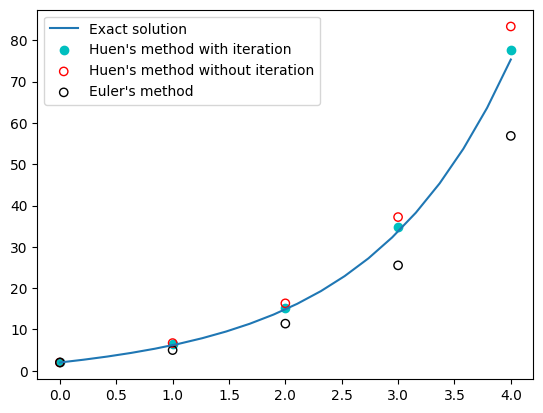

In [6]:
import matplotlib.pyplot as plt

n = 4
# ode
example2Dfx = lambda t,y: 4*np.exp(0.8*t) - 0.5*y
# solution of ode
y , t, _ = HeunMethod(example2Dfx, 2.0, 0.0, 4.0, n)
yNoIter , tNoIter, _ = HeunMethod(example2Dfx, 2.0, 0.0, 4.0, n, False)
yEuler , tEuler = EulerMethod(example2Dfx, 2.0, 0.0, 4.0, n)

# exact solution
fx_exact = lambda t : np.exp(-0.5*t) * (-1.07692 + 3.07692 * np.exp(1.3*t))
tt = np.linspace(0,4,20)
y_exact = [fx_exact(ti) for ti in tt]

# plot
plt.plot(tt,y_exact)
plt.scatter(t,y,c='c')
plt.scatter(tNoIter, yNoIter, edgecolors='r', facecolors='none')
plt.scatter(tEuler, yEuler, edgecolors='k', facecolors='none')
plt.legend([
    "Exact solution",
    "Huen's method with iteration",
    "Huen's method without iteration",
    "Euler's method"])

plt.show()

## 4-2) Error analysis of Heun's mehtod
* Recal the trapezoide rule (for explicit functions of t) for integration over one sub-interval $[t_i,t_{i+1}]$:
$$
I_i = \frac{h}{2}(f(t_i)+f(t_{i+1}))  \tag{4-5}
$$
* In Heun's method we are usign the same formula for integration over one time step:
$$
y_{i+1} = y_i + \frac{h}{2}(f(t_i,y_i)+f(t_{i+1},y^0_{i+1})) \tag{4-2}
$$  
* So, accordingly we can say that the local trunction error of Heun's method is similar to trapezoide rule, given by:
$$
E_t = -\frac{f^{"}(ξ)}{12}h^3  \tag{4-6}
$$
* The **local truncation error** of Heun's method is $O(h^3)$.
* The **global truncation error** of Heun's method is $O(h^2)$.

<div align="center">
🟦 🟦 🟦
</div>

---



# 🟠 5) Midpoint method
* The predictor estimates the value of y at midpoint between $[t_i,t_{i+1}]$:
$$
y_{i+1/2} = y_i+f(t_i,y_i) \frac{h}{2} \tag{5-1}
$$
* The corrector obtains the value of y at $t_{i+1}$ using:
$$
y_{i+1} = y_i + f(t_{i+1/2},y_{i+1/2})h \tag{5-2}
$$



<div align="center">
<img src="https://drive.google.com/uc?id=1PL3cZtUsM176yuH0wwT31QNQ_dJI_FBz" width="700">
</div>

<div align="center">
🟧 🟧 🟧
</div>


---



# 🟣 6) Runge-Kutta methods


## 6-1) Overview of Runge-Kutta methods
* For integrating we use the single-step formula:
$$
y_{i+1} = y_i+\phi h  \tag{6-1}
$$
* The soloe is calculated by (where $a_i$s are constants):
$$
\phi = a_1k_1 + a_2k_2+...+a_nk_n \tag{6-2}
$$
* In Eq. (6-2), the $k_i$s are obtained as follows:
$$
\begin{aligned}
k_1 &= f(t_i,y_i) \\
k_2 &= f(t_i+p_1h , \ \  y_i+q_{11}k_1h) \\
k_3 &= f(t_i+p_2h , \ \  y_i+q_{21}k_1h+q_{22}k_2h) \\
. \\
. \\
k_n &= f(t_i+p_{n-1}h , \ \  y_i+q_{n-1,1}k_1h+q_{n-1,2}k_2h+ ...+q_{n-1,n-1}k_{n-1}h)
\end{aligned}
\tag{6-3}
$$

## 6-2) Second-order Runge-Kutta method
* we have two versions of second-order method:
 * The most usaul version is similar to Heun's method without iteration:
 $$
 \begin{aligned}
 \phi &= \frac{1}{2}(k_1+k_2) \\
 k_1 &= f(t_i,y_i) \\
 k_2 & = f(t_i+h, y_i + k_1h)
 \end{aligned}
 \tag{6-4}
 $$
 * The other version is suggested by *Ralston*:
  $$
 \begin{aligned}
 \phi &= (\frac{1}{3}k_1+\frac{2}{3}k_2) \\
 k_1 &= f(t_i,y_i) \\
 k_2 & = f(t_i+\frac{3}{4}h, y_i + \frac{3}{4}k_1h)
 \end{aligned}
 \tag{6-5}
 $$

6-3) Third-order Runge-Kutta method
* The classical form of 3rd order method is:
  $$
 \begin{aligned}
 \phi &= (\frac{1}{6}k_1+\frac{4}{6}k_2+\frac{1}{6}k_3) \\
 k_1 &= f(t_i,y_i) \\
 k_2 & = f(t_i+\frac{1}{2}h, y_i + \frac{1}{2}k_1h) \\
 k_3 & = f(t_i+h, y_i -k_1h+2k_2h)
 \end{aligned}
 \tag{6-6}
 $$
* Other forms of 3rd order Runge-Kutta methods also exist.

## 6-4) Fourth-order Runge-Kutta method
* The classical form of 4th order method is:
 $$
 \begin{aligned}
 \phi &= (\frac{1}{6}k_1+\frac{2}{6}k_2+\frac{2}{6}k_3+\frac{1}{6}k_4) \\
 k_1 &= f(t_i,y_i) \\
 k_2 & = f(t_i+\frac{1}{2}h, y_i + \frac{1}{2}k_1h) \\
 k_3 & = f(t_i+\frac{1}{2}h, y_i + \frac{1}{2}k_2h) \\
 k_4 & = f(t_i+h, y_i + k_3h)
 \end{aligned}
 \tag{6-7}
 $$

* Graphical depiction of the slope estimates in the fourth-order RK method.
<div align="center">
<img src="https://drive.google.com/uc?id=1M3KNpfGa2Y0_n0X4VhMTWY-Da1R4ZF6q" width="500">
</div>

## 6-5) Error analysis or Runge-Kutta methods
* **2nd order method**:
 * local truncation error: $O(h^3)$
 * global truncation error: $O(h^2)$
* **3rd order method**:
 * local truncation error: $O(h^4)$
 * global truncation error: $O(h^3)$
* **4th order method**:
 * local truncation error: $O(h^5)$
 * global truncation error: $O(h^4)$

### ❓ **Example 3:**


## 6-6) Code for 4th order Runge-Kutta

In [10]:
import numpy as np
def rk4(dfx, y0, a, b, n):
  h = (b-a)/n

  y = np.zeros((n+1,))
  x = np.zeros((n+1,))

  y[0] = y0
  x[0] = a

  for i in range(n):
    x[i+1] = a + (i+1)*h
    k1 = dfx(x[i],y[i])
    k2 = dfx(x[i]+0.5*h, y[i]+0.5*k1*h)
    k3 = dfx(x[i]+0.5*h, y[i]+0.5*k2*h)
    k4 = dfx(x[i]+h, y[i]+k3*h)
    y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6.0

  return y, x

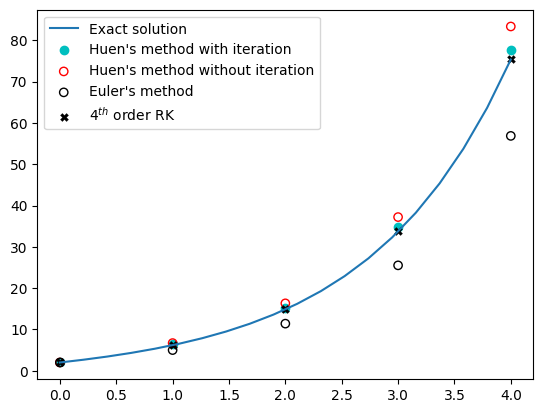

In [26]:
import matplotlib.pyplot as plt

n = 4
# ode
example3Dfx = lambda t,y: 4*np.exp(0.8*t) - 0.5*y
# solution of ode
y , t, _ = HeunMethod(example3Dfx, 2.0, 0.0, 4.0, n)
yNoIter , tNoIter, _ = HeunMethod(example3Dfx, 2.0, 0.0, 4.0, n, False)
yEuler , tEuler = EulerMethod(example3Dfx, 2.0, 0.0, 4.0, n)
yrk4 , trk4 = rk4(example3Dfx, 2.0, 0.0, 4.0, n)

# exact solution
fx_exact = lambda t : np.exp(-0.5*t) * (-1.07692 + 3.07692 * np.exp(1.3*t))
tt = np.linspace(0,4,20)
y_exact = [fx_exact(ti) for ti in tt]

# plot
plt.plot(tt,y_exact)
plt.scatter(t,y,c='c')
plt.scatter(tNoIter, yNoIter, edgecolors='r', facecolors='none')
plt.scatter(tEuler, yEuler, edgecolors='k', facecolors='none')
plt.scatter(trk4, yrk4, marker='X', c='k',  linewidths=0.1)
plt.legend([
    "Exact solution",
    "Huen's method with iteration",
    "Huen's method without iteration",
    "Euler's method",
    "$4^{th}$ order RK"])
plt.show()

# 🟢 7) Extension to system of equations

# 🟡 8) Adaptive Range-Kutta methods